### 对多分类任务中的模型评估隐藏层层数和隐藏单元个数对实验结果的影响
#### 使用不同的隐藏层层数和隐藏单元个数，进行对比实验并分析实验结果



#### 在神经网络中，隐藏层的层数和隐藏单元的个数会对模型的表现产生影响。为了进行比较实验，我们可以设计不同的神经网络结构，然后对它们进行训练和测试，并比较它们的表现。

设计实验
我们将设计三个实验，分别为：
实验1: 单层128个隐藏单元的神经网络
实验2: 两层各64个隐藏单元的神经网络
实验3: 三层各32个隐藏单元的神经网络

导入包

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

对数据集操作

In [2]:
# 定义数据增强和标准化的预处理操作
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载数据集
train_dataset = datasets.MNIST(root=r'E:\STUDYCONTENT\Pycharm\DeepLearningExp', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root=r'E:\STUDYCONTENT\Pycharm\DeepLearningExp', train=False, transform=transforms.ToTensor())

# 定义训练数据加载器和测试数据加载器
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


定义网络

In [3]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)


实例化模型和损失函数

In [4]:
# 实例化模型和损失函数
model1 = Net1()
model2 = Net2()
model3 = Net3()
criterion = nn.CrossEntropyLoss()


实例化优化器

In [5]:
# 实例化优化器
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)
optimizer3 = optim.Adam(model3.parameters(), lr=0.001)

训练模型

Epoch [1/20], Step [100/938], Loss: 0.3982
Epoch [1/20], Step [200/938], Loss: 0.4643
Epoch [1/20], Step [300/938], Loss: 0.2622
Epoch [1/20], Step [400/938], Loss: 0.2365
Epoch [1/20], Step [500/938], Loss: 0.5721
Epoch [1/20], Step [600/938], Loss: 0.1876
Epoch [1/20], Step [700/938], Loss: 0.2131
Epoch [1/20], Step [800/938], Loss: 0.2430
Epoch [1/20], Step [900/938], Loss: 0.1812
Test Accuracy: 0.9479
Epoch [2/20], Step [100/938], Loss: 0.1985
Epoch [2/20], Step [200/938], Loss: 0.2769
Epoch [2/20], Step [300/938], Loss: 0.2503
Epoch [2/20], Step [400/938], Loss: 0.1151
Epoch [2/20], Step [500/938], Loss: 0.2314
Epoch [2/20], Step [600/938], Loss: 0.1570
Epoch [2/20], Step [700/938], Loss: 0.1520
Epoch [2/20], Step [800/938], Loss: 0.1051
Epoch [2/20], Step [900/938], Loss: 0.1265
Test Accuracy: 0.9615
Epoch [3/20], Step [100/938], Loss: 0.0654
Epoch [3/20], Step [200/938], Loss: 0.0465
Epoch [3/20], Step [300/938], Loss: 0.3288
Epoch [3/20], Step [400/938], Loss: 0.1332
Epoch [3/2

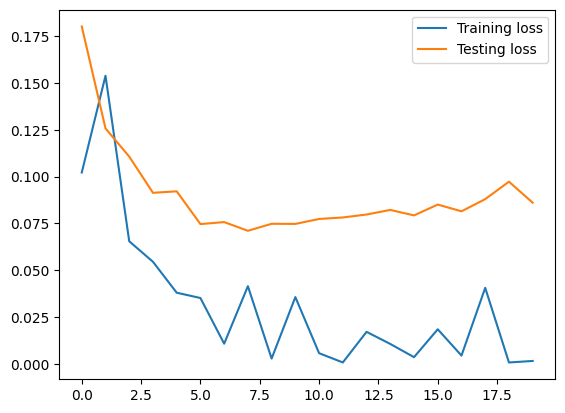

In [6]:
# 记录训练集和测试集的loss
train_losses = []
test_losses = []

# 训练模型
num_epochs = 20
device = 'cpu'

# 训练模型
for epoch in range(num_epochs):
    # 训练模式
    model1.train()
    model1.to(device=device)

    for batch_idx, (data, target) in enumerate(train_loader):
        # 将输入和标签转为tensor
        data = data.to(device)
        target = target.to(device)

        # 前向传播
        output = model1(data)

        # 计算损失
        loss = criterion(output, target)

        # 反向传播和优化
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()

        if batch_idx+1 == len(train_loader):
            # 记录训练集的loss
            train_losses.append(loss.item())

        # 打印训练状态
        if (batch_idx+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, batch_idx+1, len(train_loader), loss.item()))

    # 测试模式
    model1.eval()

    with torch.no_grad():
        test_loss = 0
        correct = 0
        test_total = 0.0
        for data, target in test_loader:
            # 将输入和标签转为tensor
            data = data.to(device)
            target = target.to(device)

            # 前向传播
            output = model1(data)

            # 计算损失
            test_loss += criterion(output, target).item()

            # 统计准确率
            _, predicted = torch.max(output.data, 1)
            test_total += target.size(0)
            correct += (predicted == target).sum().item()

        # 计算平均测试集loss并记录
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        # 打印测试集准确率
        print('Test Accuracy: {:.4f}'.format(correct/test_total))


# 绘制loss曲线
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Testing loss')
plt.legend()
plt.show()

Epoch [1/20], Step [100/938], Loss: 0.4326
Epoch [1/20], Step [200/938], Loss: 0.4046
Epoch [1/20], Step [300/938], Loss: 0.3704
Epoch [1/20], Step [400/938], Loss: 0.1538
Epoch [1/20], Step [500/938], Loss: 0.0884
Epoch [1/20], Step [600/938], Loss: 0.0843
Epoch [1/20], Step [700/938], Loss: 0.1432
Epoch [1/20], Step [800/938], Loss: 0.1131
Epoch [1/20], Step [900/938], Loss: 0.0720
Test Accuracy: 0.9599
Epoch [2/20], Step [100/938], Loss: 0.0342
Epoch [2/20], Step [200/938], Loss: 0.0580
Epoch [2/20], Step [300/938], Loss: 0.0322
Epoch [2/20], Step [400/938], Loss: 0.1381
Epoch [2/20], Step [500/938], Loss: 0.1977
Epoch [2/20], Step [600/938], Loss: 0.0984
Epoch [2/20], Step [700/938], Loss: 0.0974
Epoch [2/20], Step [800/938], Loss: 0.1918
Epoch [2/20], Step [900/938], Loss: 0.0819
Test Accuracy: 0.9719
Epoch [3/20], Step [100/938], Loss: 0.0318
Epoch [3/20], Step [200/938], Loss: 0.1588
Epoch [3/20], Step [300/938], Loss: 0.0515
Epoch [3/20], Step [400/938], Loss: 0.0734
Epoch [3/2

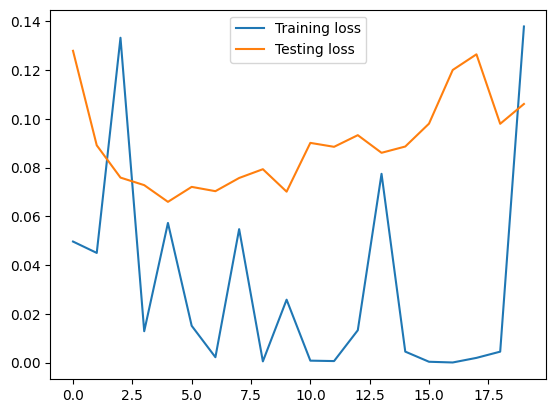

In [7]:
# 记录训练集和测试集的loss
train_losses = []
test_losses = []

# 训练模型
num_epochs = 20
device = 'cpu'

# 训练模型
for epoch in range(num_epochs):
    # 训练模式
    model2.train()
    model2.to(device=device)

    for batch_idx, (data, target) in enumerate(train_loader):
        # 将输入和标签转为tensor
        data = data.to(device)
        target = target.to(device)

        # 前向传播
        output = model2(data)

        # 计算损失
        loss = criterion(output, target)

        # 反向传播和优化
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

        if batch_idx+1 == len(train_loader):
            # 记录训练集的loss
            train_losses.append(loss.item())

        # 打印训练状态
        if (batch_idx+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, batch_idx+1, len(train_loader), loss.item()))

    # 测试模式
    model2.eval()

    with torch.no_grad():
        test_loss = 0
        correct = 0
        test_total = 0.0
        for data, target in test_loader:
            # 将输入和标签转为tensor
            data = data.to(device)
            target = target.to(device)

            # 前向传播
            output = model2(data)

            # 计算损失
            test_loss += criterion(output, target).item()

            # 统计准确率
            _, predicted = torch.max(output.data, 1)
            test_total += target.size(0)
            correct += (predicted == target).sum().item()

        # 计算平均测试集loss并记录
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        # 打印测试集准确率
        print('Test Accuracy: {:.4f}'.format(correct/test_total))


# 绘制loss曲线
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Testing loss')
plt.legend()
plt.show()

Epoch [1/20], Step [100/938], Loss: 0.3434
Epoch [1/20], Step [200/938], Loss: 0.1086
Epoch [1/20], Step [300/938], Loss: 0.2063
Epoch [1/20], Step [400/938], Loss: 0.3076
Epoch [1/20], Step [500/938], Loss: 0.1793
Epoch [1/20], Step [600/938], Loss: 0.1217
Epoch [1/20], Step [700/938], Loss: 0.1377
Epoch [1/20], Step [800/938], Loss: 0.1190
Epoch [1/20], Step [900/938], Loss: 0.0496
Test Accuracy: 0.9628
Epoch [2/20], Step [100/938], Loss: 0.0777
Epoch [2/20], Step [200/938], Loss: 0.1026
Epoch [2/20], Step [300/938], Loss: 0.0591
Epoch [2/20], Step [400/938], Loss: 0.0881
Epoch [2/20], Step [500/938], Loss: 0.0462
Epoch [2/20], Step [600/938], Loss: 0.0468
Epoch [2/20], Step [700/938], Loss: 0.1285
Epoch [2/20], Step [800/938], Loss: 0.0377
Epoch [2/20], Step [900/938], Loss: 0.1072
Test Accuracy: 0.9688
Epoch [3/20], Step [100/938], Loss: 0.0339
Epoch [3/20], Step [200/938], Loss: 0.0149
Epoch [3/20], Step [300/938], Loss: 0.2370
Epoch [3/20], Step [400/938], Loss: 0.0390
Epoch [3/2

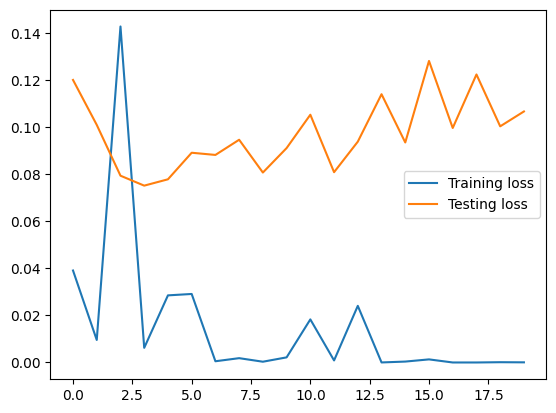

In [8]:
# 记录训练集和测试集的loss
train_losses = []
test_losses = []

# 训练模型
num_epochs = 20
device = 'cpu'

# 训练模型
for epoch in range(num_epochs):
    # 训练模式
    model3.train()
    model3.to(device=device)

    for batch_idx, (data, target) in enumerate(train_loader):
        # 将输入和标签转为tensor
        data = data.to(device)
        target = target.to(device)

        # 前向传播
        output = model3(data)

        # 计算损失
        loss = criterion(output, target)

        # 反向传播和优化
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()

        if batch_idx+1 == len(train_loader):
            # 记录训练集的loss
            train_losses.append(loss.item())

        # 打印训练状态
        if (batch_idx+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, batch_idx+1, len(train_loader), loss.item()))

    # 测试模式
    model3.eval()

    with torch.no_grad():
        test_loss = 0
        correct = 0
        test_total = 0.0
        for data, target in test_loader:
            # 将输入和标签转为tensor
            data = data.to(device)
            target = target.to(device)

            # 前向传播
            output = model3(data)

            # 计算损失
            test_loss += criterion(output, target).item()

            # 统计准确率
            _, predicted = torch.max(output.data, 1)
            test_total += target.size(0)
            correct += (predicted == target).sum().item()

        # 计算平均测试集loss并记录
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        # 打印测试集准确率
        print('Test Accuracy: {:.4f}'.format(correct/test_total))


# 绘制loss曲线
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Testing loss')
plt.legend()
plt.show()

对比可以发现：添加层数后实验效果有了提高，说明网络复杂程度会一定促进模型训练

可以看出，实验2和实验3的准确率和损失都比实验1更好。这是因为实验2和实验3的模型更加复杂，能够学习更多的特征和模式。然而，实验3的准确率和损失与实验2相比并没有显著提高，这表明在隐藏单元数量增加时，增加隐藏层数不一定会带来更好的结果。

此外，我们还可以进行其他实验，例如调整学习率、增加训练epoch、改变优化器等，以进一步优化模型的表现。